<a href="https://colab.research.google.com/github/evakaldy/Bootcamp_Final_Project/blob/eva_database_exploration/explore_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
# Krok 1: Připojte Google Disk
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [170]:
# Krok 2: Cesta k databázi na Google Disku
# Nahraďte 'path_to_your_database.db' skutečnou cestou k databázovému souboru na Google Disku
db_path = '/content/drive/MyDrive/Colab Notebooks/INTENSIVE_part_offline/final_project/data.db'


In [171]:
import sqlite3
import pandas as pd


# Connect to a SQLite database (or create one)
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

In [172]:
# Výpis všech tabulek
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Výpis názvů tabulek
for table in tables:
    print(table[0])

Accounts
sqlite_sequence
Campaigns
Clients
Outcomes


In [173]:
# To connect the Outcomes and Campaigns tables from your SQLite database on the Campaigns.ID and Outcomes.campaign_id

query = """
SELECT
c.id AS client_id,
c.age,
c.job,
c.marital,
c.education,
a.balance,
a.in_default,
a.housing,
a.loan,
ca.duration,
ca.pdays,
ca.previous,
ca.campaign, -- Added campaigns column
o.poutcome,
o.y
FROM Clients c
JOIN Accounts a ON c.id = a.client_id
JOIN Campaigns ca ON a.id = ca.account_id
JOIN Outcomes o ON ca.id = o.campaign_id
"""
# Execute the query and fetch the result into a DataFrame
merged_df = pd.read_sql_query(query, conn)
print(merged_df.shape)
# Display the joined DataFrame
print(merged_df.head())

(45211, 15)
   client_id  age           job  marital  education  balance in_default  \
0    4815378   58    management  married   tertiary   2143.0         no   
1    5217541   44    technician   single  secondary     29.0         no   
2    6654642   33  entrepreneur  married  secondary      2.0         no   
3    1421898   47   blue-collar  married    unknown   1506.0         no   
4    2387933   33       unknown   single    unknown      1.0         no   

  housing loan  duration  pdays  previous  campaign poutcome        y  
0     yes   no       261     -1         0         1  unknown  unknown  
1     yes   no       151     -1         0         1  unknown  unknown  
2     yes  yes        76     -1         0         1  unknown  unknown  
3     yes   no        92     -1         0         1  unknown  unknown  
4      no   no       198     -1         0         1  unknown  unknown  


In [174]:
merged_df['client_id'].unique().shape
print("We do not have info about prevois campaings (eacg client_id is unique)")

We do not have info about prevois campaings (eacg client_id is unique)


DATA TRANFORMATION

In [175]:
merged_df['job'].unique()

low_income = ['unemployed', 'unknown', 'housemaid',  'student', 'retired' ]
middle_income = ['services', 'technician', 'blue-collar','admin.' ]
high_income =[ 'entrepreneur', 'management', 'self-employed']

# Create a new column 'job_category' based on the 'job' column
merged_df['job_category'] = merged_df['job'].apply(
    lambda x: 'low_income' if x in low_income else
              'middle_income' if x in middle_income else
              'high_income' if x in high_income else 'Unknown'
)
encoder_job = LabelEncoder()
merged_df['job_nr'] = encoder_job.fit_transform(merged_df['job_category'])
print('JOB CATEGORY converted to number): ')
mapping = dict(zip(encoder_job.classes_, range(len(encoder_job.classes_))))
print(mapping)
print()
print('--------------------------------')





JOB CATEGORY converted to number): 
{'high_income': 0, 'low_income': 1, 'middle_income': 2}

--------------------------------


In [176]:
merged_df['age'].unique()
merged_df['age_nr'] = merged_df['age'].apply(
    lambda x: 2 if x > 60 else
              0 if x < 30 else 1
)
print('AGE converted to number: ')
print("0 younger 30, 1 between 30 and 60' , 2 == older 60 ")
print()
print('--------------------------------')



AGE converted to number: 
0 younger 30, 1 between 30 and 60' , 2 == older 60 

--------------------------------


In [177]:

merged_df['pdays_nr'] = merged_df['pdays'].apply(
    lambda x: 2 if x > 250 else
              0 if x < 50 else 1
)
print('PDAYS converted to number: ')
print("0 smaller 50, 1 between 50 and 250' , 2 == greater 250 ")
print()
print('--------------------------------')



PDAYS converted to number: 
0 smaller 50, 1 between 50 and 250' , 2 == greater 250 

--------------------------------


In [178]:
merged_df['education'].unique()
merged_df['education_nr'] = merged_df['education'].apply(
    lambda x: 2 if x == 'tertiary' else
              1 if x == 'secondary' else 0
)
print('EDUCATION converted to number: ')
print("2 'tertiary', 1 'secondary' , 0  'unknown' + 'primary' ")
print()
print('--------------------------------')

EDUCATION converted to number: 
2 'tertiary', 1 'secondary' , 0  'unknown' + 'primary' 

--------------------------------


In [179]:
# Create a new column 'job_category' based on the 'job' column
merged_df['job_category'] = merged_df['job'].apply(
    lambda x: 'low_income' if x in low_income else
              'middle_income' if x in middle_income else
              'high_income' if x in high_income else 'Unknown'
)
encoder_job = LabelEncoder()
merged_df['job_nr'] = encoder_job.fit_transform(merged_df['job_category'])
print('JOB CATEGORY converted to number): ')
mapping = dict(zip(encoder_job.classes_, range(len(encoder_job.classes_))))
print(mapping)
print()
print('--------------------------------')


JOB CATEGORY converted to number): 
{'high_income': 0, 'low_income': 1, 'middle_income': 2}

--------------------------------


In [180]:
import numpy as np

merged_df['balance_log'] = merged_df['balance'].apply(
    lambda x: 0 if x <=1 else
              np.log(x)  )

print('BALANCE made logaritmic (zero for balance <1): ')
print()
print('--------------------------------')

BALANCE made logaritmic (zero for balance <1): 

--------------------------------


In [181]:
import numpy as np

merged_df['duration_log'] = merged_df['duration'].apply(
    lambda x: 0 if x <=1 else
              np.log(x)  )

print('DURATION made logaritmic (zero for balance <1): ')
print()
print('--------------------------------')

DURATION made logaritmic (zero for balance <1): 

--------------------------------


In [182]:
import numpy as np

# merged_df['campaign_log'] = merged_df['campaign'].apply(
#     lambda x: 0 if x <=1 else
#               np.log(x)  )

# print('CAMPAIGN made logaritmic (zero for balance <1): ')
# print()
# print('--------------------------------')

merged_df['campaign_nr'] = merged_df['campaign'].apply(
    lambda x: 0 if x < 6  else 1
)
print('CAMPAIHN converted to number: ')
print("0 for pday<6, 1 for greater values ")
print()
print('--------------------------------')

CAMPAIHN converted to number: 
0 for pday<6, 1 for greater values 

--------------------------------


In [207]:
merged_df['marital_nr'] = merged_df['marital'].apply(
    lambda x: 1 if x == 'married'  else 0
)
print('MARITAL converted to number: ')
print("1 for married, 0 for single and divorced ")
print()
print('--------------------------------')

# merged_df['marital'].unique()

MARITAL converted to number: 
1 for married, 0 for single and divorced 

--------------------------------


In [183]:
import numpy as np

# merged_df['previous_log'] = merged_df['previous'].apply(
#     lambda x: 0 if x <=1 else
#               np.log(x)  )

# print('PREVIOUS made logaritmic (zero for balance <1): ')
# print()
# print('--------------------------------')


merged_df['previous_nr'] = merged_df['previous'].apply(
    lambda x: 0 if x == 0  else 1
)
print('PDAYS converted to number: ')
print("0 == 0, 1 for any other value ")
print()
print('--------------------------------')

PDAYS converted to number: 
0 == 0, 1 for any other value 

--------------------------------


In [208]:
##### CONVERT LABELS TO MUNBERS ##############

from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder instance
encoder_labels = LabelEncoder()



encoder_in_default = LabelEncoder()
merged_df['in_default_nr'] = encoder_in_default.fit_transform(merged_df['in_default'])
print('IN_DEFAULT converted to number: ')
mapping = dict(zip(encoder_in_default.classes_, range(len(encoder_in_default.classes_))))
print(mapping)
print()
print('--------------------------------')

encoder_housing = LabelEncoder()
merged_df['housing_nr'] = encoder_housing.fit_transform(merged_df['housing'])
print('HOUSING converted to number: ')
mapping = dict(zip(encoder_housing.classes_, range(len(encoder_housing.classes_))))
print(mapping)
print()
print('--------------------------------')


encoder_loan = LabelEncoder()
merged_df['loan_nr'] = encoder_loan.fit_transform(merged_df['loan'])
print('LOAN converted to number: ')
mapping = dict(zip(encoder_loan.classes_, range(len(encoder_loan.classes_))))
print(mapping)
print()
print('--------------------------------')

encoder_poutcome = LabelEncoder()
merged_df['poutcome_nr'] = encoder_poutcome.fit_transform(merged_df['poutcome'])
print('POUTCOME converted to number: ')
mapping = dict(zip(encoder_poutcome.classes_, range(len(encoder_poutcome.classes_))))
print(mapping)
print()
print('--------------------------------')


encoder_y = LabelEncoder()
merged_df['y_nr'] = encoder_y.fit_transform(merged_df['y'])
print('Y converted to number: ')
mapping = dict(zip(encoder_y.classes_, range(len(encoder_y.classes_))))
print(mapping)
print()
print('--------------------------------')

merged_df['education_job_nr'] = merged_df['education_nr'] + merged_df['job_nr']

## Create a new column with job and education

print(merged_df.head())




IN_DEFAULT converted to number: 
{'no': 0, 'yes': 1}

--------------------------------
HOUSING converted to number: 
{'no': 0, 'yes': 1}

--------------------------------
LOAN converted to number: 
{'no': 0, 'yes': 1}

--------------------------------
POUTCOME converted to number: 
{'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}

--------------------------------
Y converted to number: 
{'no': 0, 'unknown': 1, 'yes': 2}

--------------------------------
   client_id  age           job  marital  education  balance in_default  \
0    4815378   58    management  married   tertiary   2143.0         no   
1    5217541   44    technician   single  secondary     29.0         no   
2    6654642   33  entrepreneur  married  secondary      2.0         no   
3    1421898   47   blue-collar  married    unknown   1506.0         no   
4    2387933   33       unknown   single    unknown      1.0         no   

  housing loan  duration  ...  duration_log  campaign_nr  previous_nr  \
0     yes   

In [209]:
## REMOVE COLUMNS which are not numbers
only_nr_df = merged_df.drop(columns=['job', 'marital', 'job_category', 'education', 'housing', 'in_default', 'housing', 'loan', 'poutcome', 'y'], inplace=False)
only_nr_df.head()


,client_id,age,balance,duration,pdays,previous,campaign,job_nr,age_nr,pdays_nr,...,duration_log,campaign_nr,previous_nr,marital_nr,in_default_nr,housing_nr,loan_nr,poutcome_nr,y_nr,education_job_nr
0,4815378,58,2143.0,261,-1,0,1,0,1,0,...,5.564520,0,0,1,0,1,0,3,1,2
1,5217541,44,29.0,151,-1,0,1,2,1,0,...,5.017280,0,0,0,0,1,0,3,1,3
2,6654642,33,2.0,76,-1,0,1,0,1,0,...,4.330733,0,0,1,0,1,1,3,1,1
3,1421898,47,1506.0,92,-1,0,1,2,1,0,...,4.521789,0,0,1,0,1,0,3,1,2
4,2387933,33,1.0,198,-1,0,1,1,1,0,...,5.288267,0,0,0,0,0,0,3,1,1


In [210]:
### DIVIDE into train_negative, train_positive and test
df_train_negative = only_nr_df[only_nr_df['y_nr'].isin([ 0])]
df_train_positive = only_nr_df[only_nr_df['y_nr'].isin([2])]
df_test = only_nr_df[only_nr_df['y_nr'].isin([1 ,3])]

df_train_positive.head()

,client_id,age,balance,duration,pdays,previous,campaign,job_nr,age_nr,pdays_nr,...,duration_log,campaign_nr,previous_nr,marital_nr,in_default_nr,housing_nr,loan_nr,poutcome_nr,y_nr,education_job_nr
86,4961336,56,45.0,1467,-1,0,1,2,1,0,...,7.290975,0,0,1,0,0,0,3,2,3
1124,9306845,29,199.0,1689,-1,0,4,0,0,0,...,7.431892,0,0,1,0,1,1,3,2,2
1416,5621406,43,388.0,2087,-1,0,2,0,1,0,...,7.643483,0,0,0,0,1,0,3,2,2
1795,6432442,60,65.0,1028,-1,0,2,2,1,0,...,6.935370,0,0,1,0,1,0,3,2,2
2096,5754389,32,311.0,757,-1,0,2,0,1,0,...,6.629363,0,0,0,0,0,0,3,2,2


In [211]:
import pandas as pd
from scipy import stats
from scipy.stats import chi2_contingency

# Assuming df_train_negative and df_train_positive are your two DataFrames

# Exclude 'client_id' from the list of columns for comparison
columns_to_test_continuous = ['age', 'balance', 'duration','duration_log', 'pdays', 'previous',
                   'campaign', 'balance_log']

columns_to_test_cathegorical = ['marital_nr', 'job_nr', 'education_nr', 'age_nr', 'pdays_nr', 'previous_nr', 'campaign_nr',
                   'in_default_nr', 'housing_nr', 'loan_nr', 'poutcome_nr',  'education_job_nr']


# Initialize an empty dictionary to store the p-values
p_values = {}

# Loop through each column to compute the p-value
for column in columns_to_test_continuous:
    # Extract the two columns from the two DataFrames
    data_neg = df_train_negative[column]
    data_pos = df_train_positive[column]

    # Check normality (Shapiro-Wilk test)
    _, p_normal_neg = stats.shapiro(data_neg)
    _, p_normal_pos = stats.shapiro(data_pos)


    # If both distributions are normal, use t-test
    if p_normal_neg > 0.05 and p_normal_pos > 0.05:
        # t-test (for normally distributed data)
        t_stat, p_value = stats.ttest_ind(data_neg, data_pos)
    else:
        # Mann-Whitney U test (for non-normally distributed data)
        u_stat, p_value = stats.mannwhitneyu(data_neg, data_pos)

    # Store the p-value for the current column
    p_values[column] = p_value

    # check if the values are only binary
    # Check if a specific column is binary
    is_binary = data_neg.isin([0, 1]).all()
    # # print(f"Is binary? {is_binary}")





for column in columns_to_test_cathegorical:
  # Extract the two columns from the two DataFrames
  data_neg = df_train_negative[column]
  data_pos = df_train_positive[column]
  all = pd.concat([data_neg, data_pos], ignore_index=True)

  categories = all.unique() # all cathegories
  # Count occurrences of each category in both DataFrames
  counts_df1 = data_neg.value_counts().reindex(categories, fill_value=0)
  counts_df2 = data_pos.value_counts().reindex(categories, fill_value=0)

  # Create a contingency table
  contingency_table = pd.DataFrame({'df1': counts_df1, 'df2': counts_df2}).T

  # Perform the Chi-Square test
  chi2, p_value, dof, expected = chi2_contingency(contingency_table)
  print(f"column {column} is binary, chi2 {chi2}")

  # Store the p-value for the current column
  p_values[column] = p_value

# Convert p-values dictionary to a DataFrame for easier visualization
p_value_df = pd.DataFrame(list(p_values.items()), columns=['Column', 'p-value'])



# Interpretation of p-value:
# p-value < 0.05: Reject the null hypothesis, indicating a statistically significant difference between the two datasets for that column.
# p-value >= 0.05: Fail to reject the null hypothesis, indicating no statistically significant difference between the two datasets for that column.

stat_diff = []
for p in p_value_df['p-value']:
  if p < 0.05:
    stat_diff.append(1)  # Append 1 for statistical difference
  else:
    stat_diff.append(0)  # Append 0 for no statistical difference



p_value_df['statistically_different'] = stat_diff

# Display the p-values
print(p_value_df)





column marital_nr is binary, chi2 18.477405856682516
column job_nr is binary, chi2 36.76973316255313
column education_nr is binary, chi2 15.1618699769161
column age_nr is binary, chi2 99.62996502477496
column pdays_nr is binary, chi2 153.4416542834824
column previous_nr is binary, chi2 117.388534999245
column campaign_nr is binary, chi2 9.271156489445623
column in_default_nr is binary, chi2 0.0
column housing_nr is binary, chi2 48.88462833144263
column loan_nr is binary, chi2 21.87182161746215
column poutcome_nr is binary, chi2 386.8773872252409
column education_job_nr is binary, chi2 1.0006728335460453
              Column        p-value  statistically_different
0                age   2.740020e-01                        0
1            balance   1.096141e-07                        1
2           duration  2.329297e-121                        1
3       duration_log  2.329297e-121                        1
4              pdays   5.717436e-24                        1
5           previous   

To compare the distributions of each column in the df_train_negative and df_train_positive datasets visually, you can use overlaid histograms or density plots (using Seaborn or Matplotlib). Here, we will generate a plot for each column, overlaying the distributions of df_train_negative and df_train_positive with different colors.

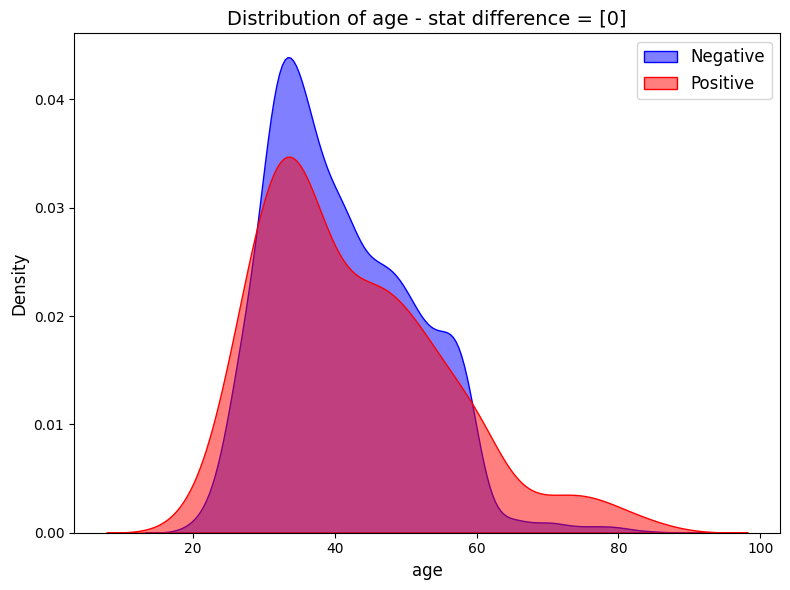

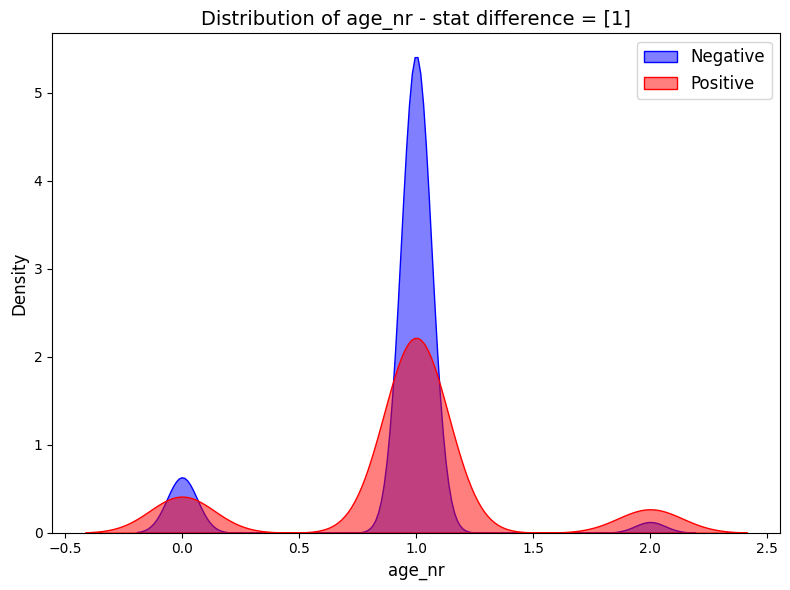

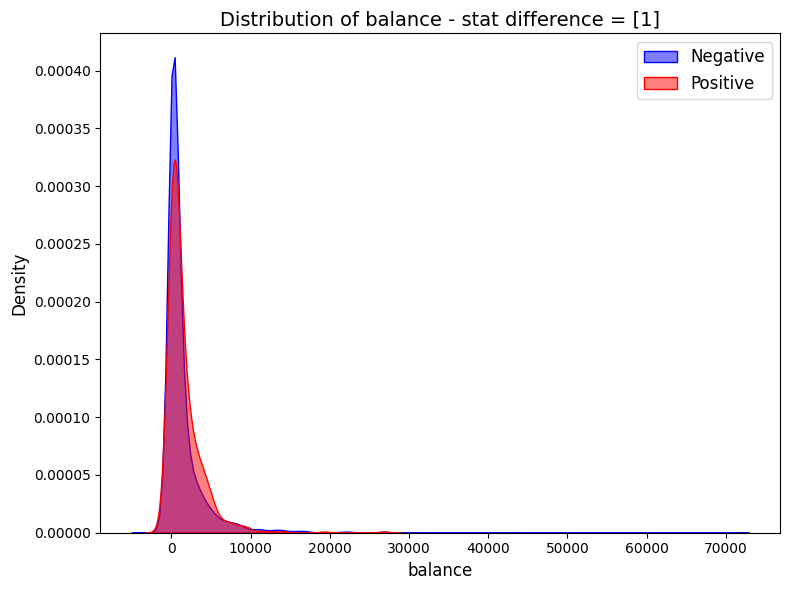

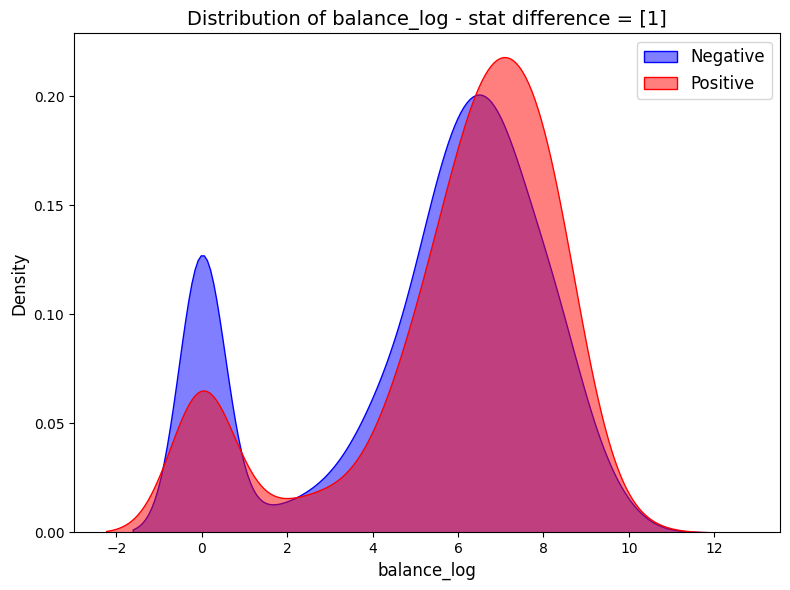

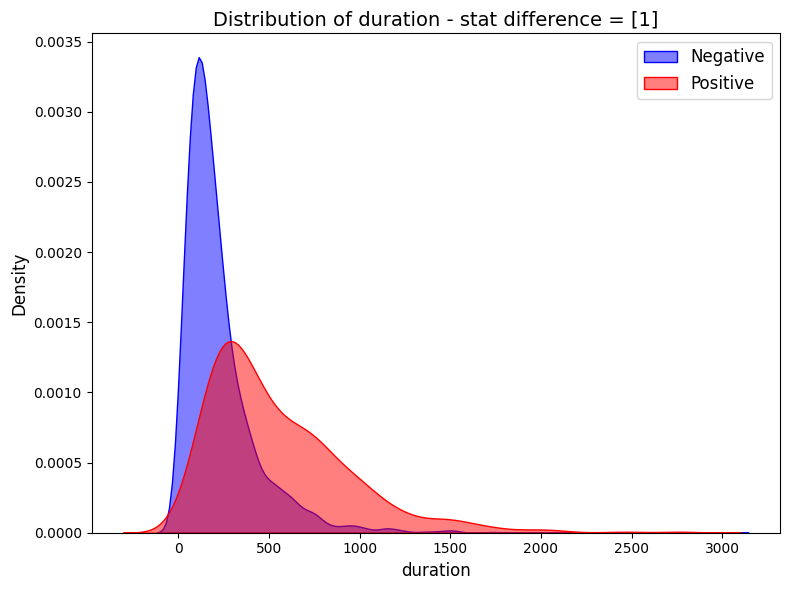

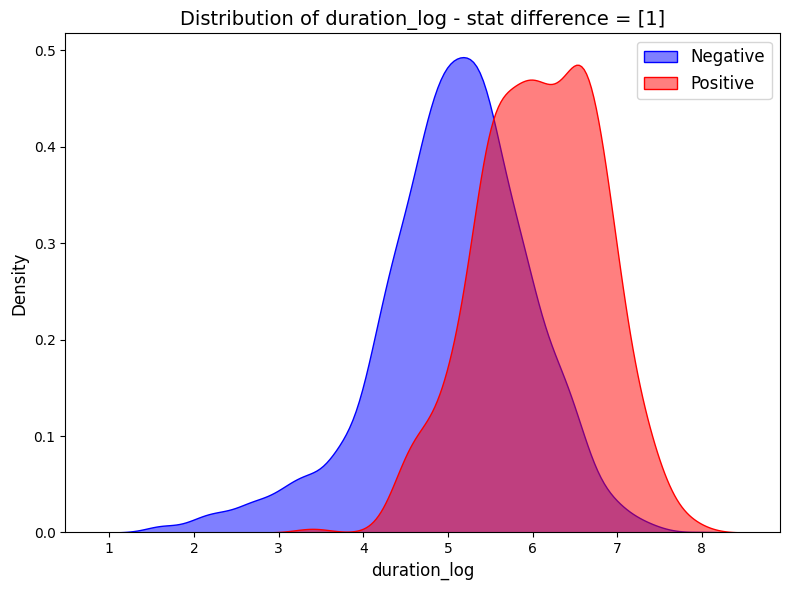

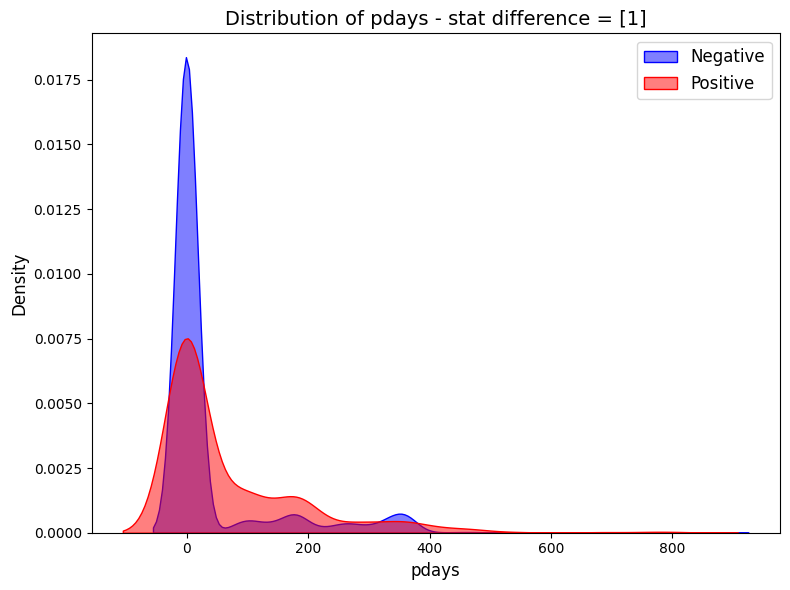

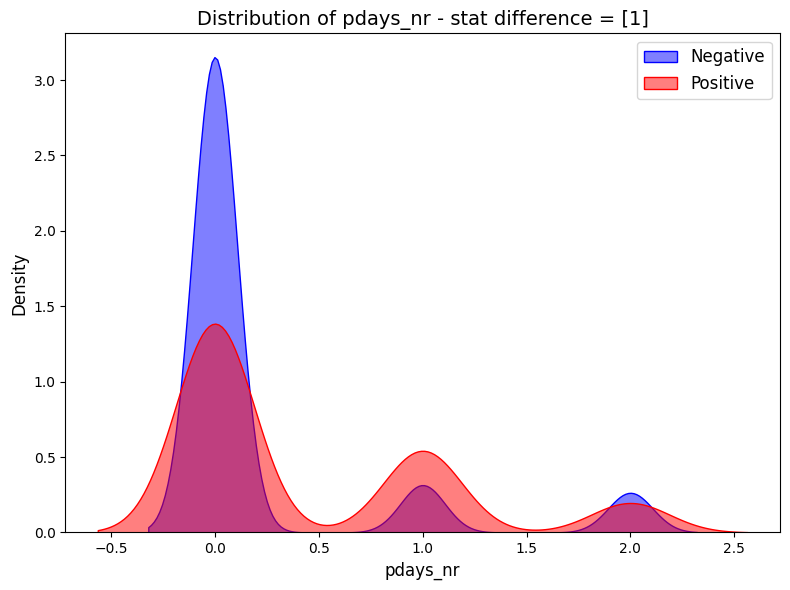

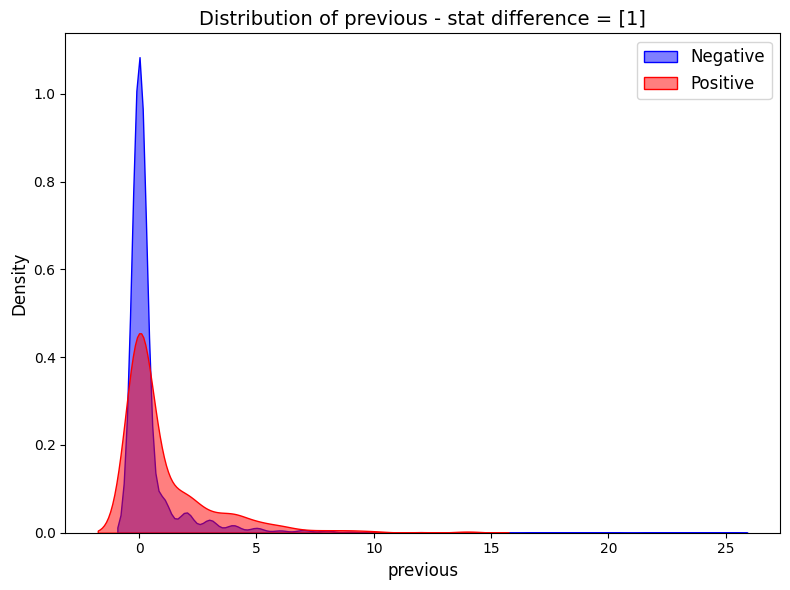

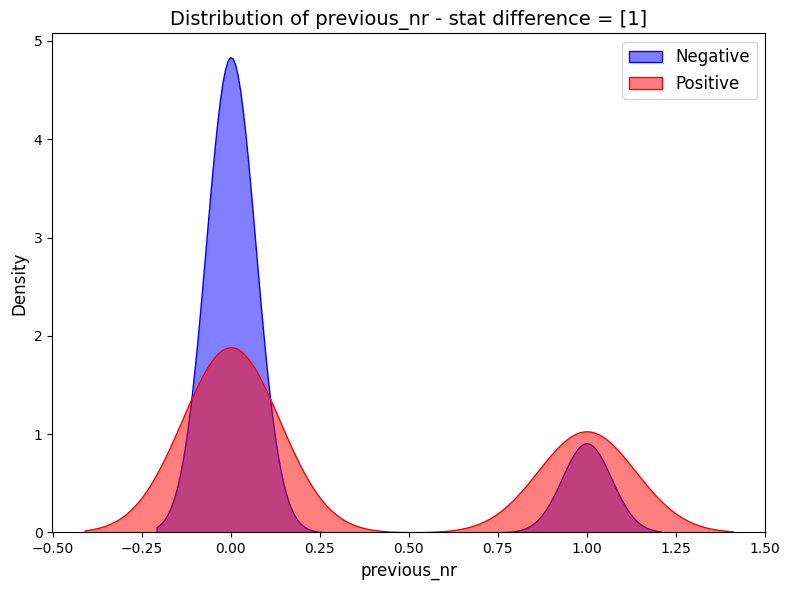

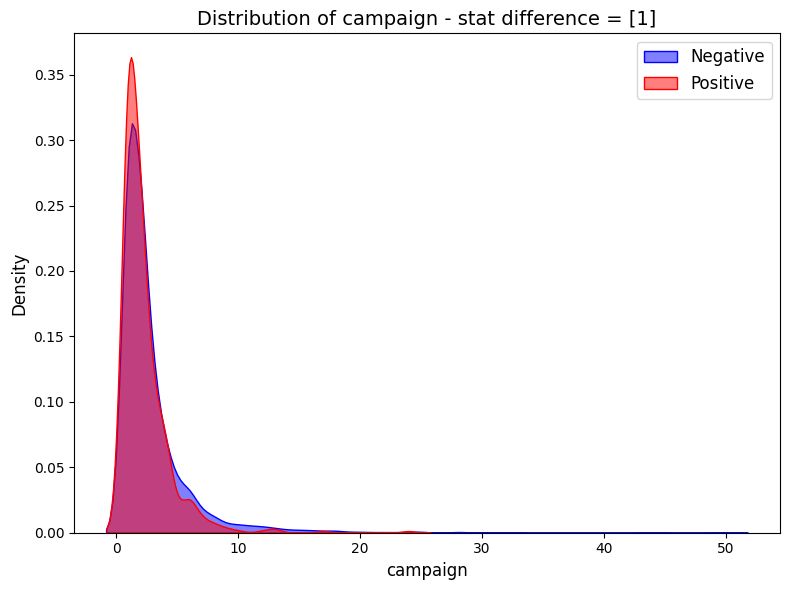

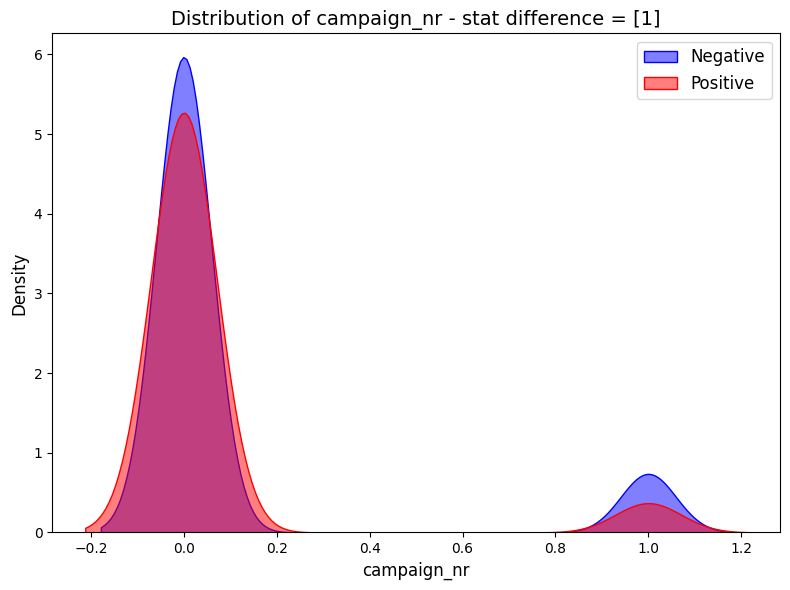

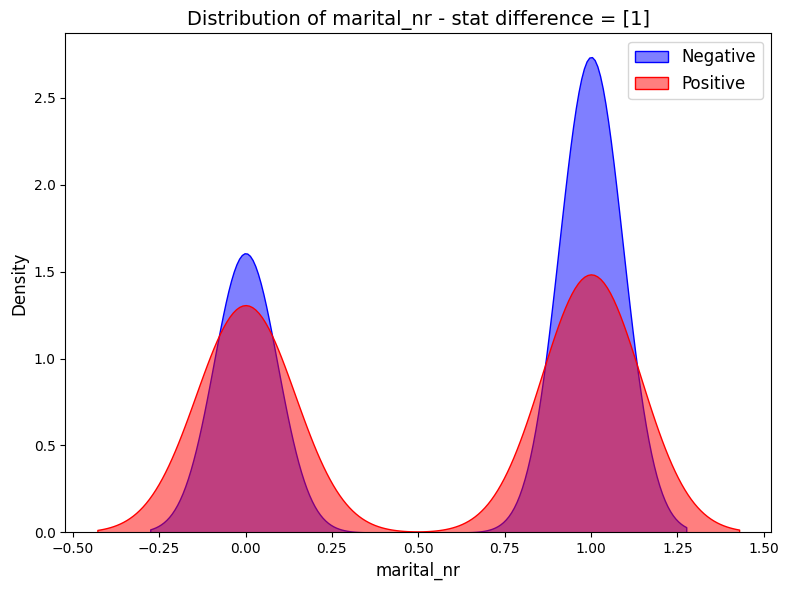

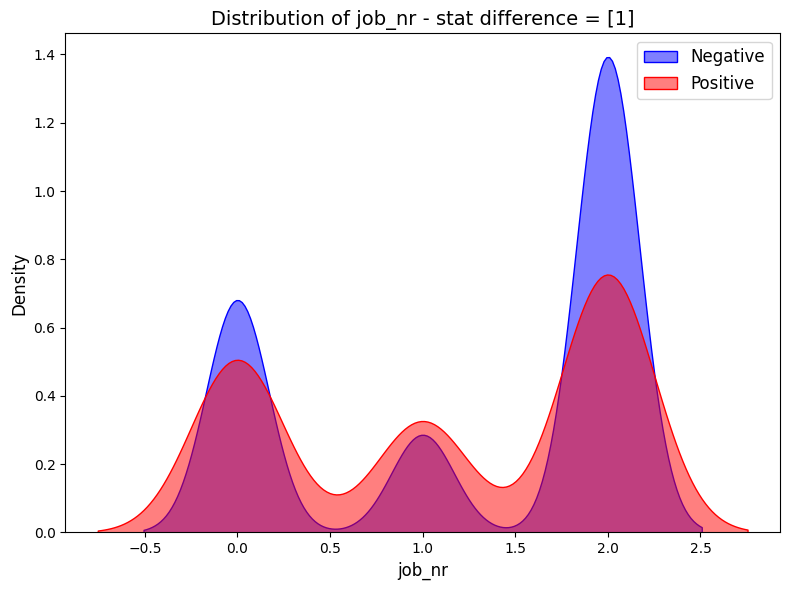

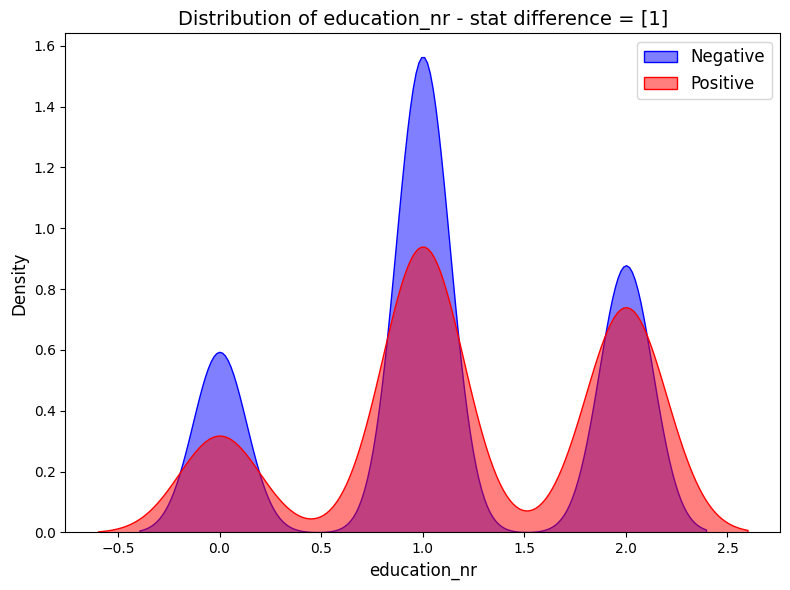

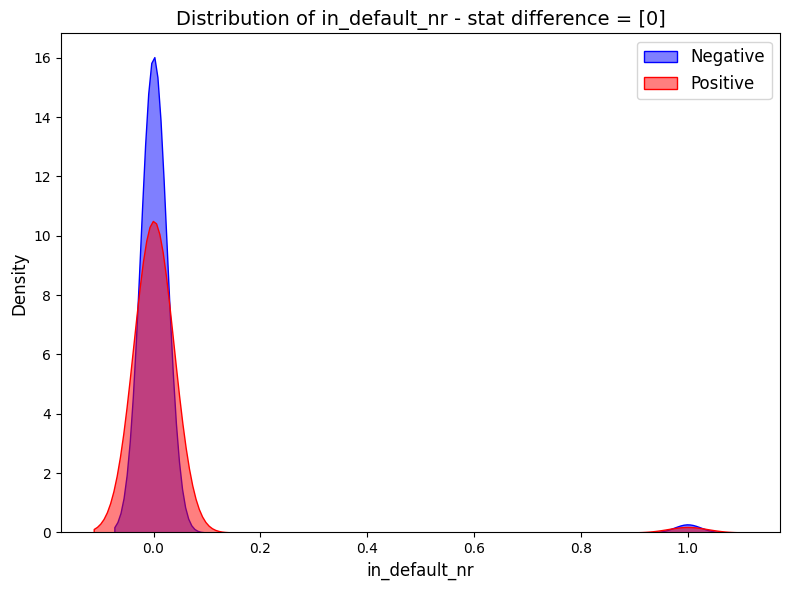

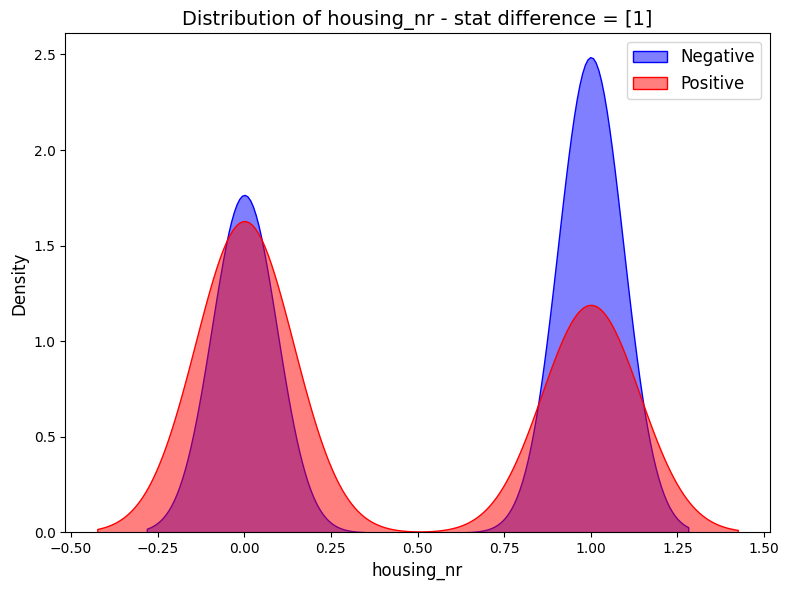

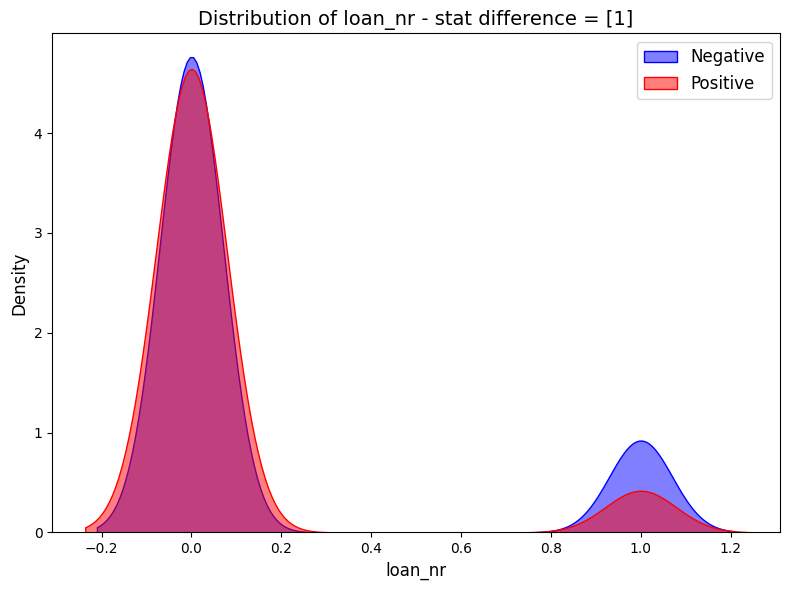

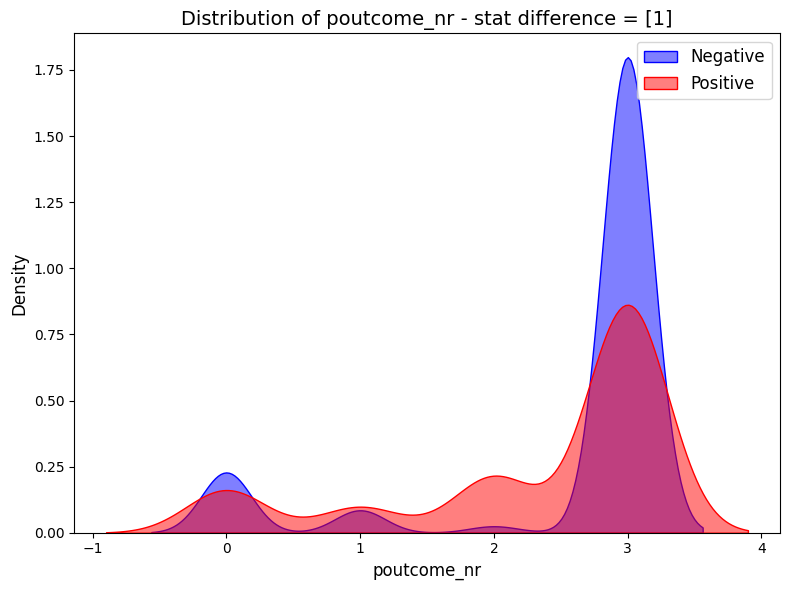

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataframes `df_train_negative` and `df_train_positive` exist
columns_to_plot = ['age', 'age_nr', 'balance', 'balance_log', 'duration', 'duration_log','pdays', 'pdays_nr', 'previous', 'previous_nr',
                   'campaign', 'campaign_nr', 'marital_nr', 'job_nr', 'education_nr',
                   'in_default_nr', 'housing_nr', 'loan_nr', 'poutcome_nr']
# columns_to_plot = columns_to_test_continuous + columns_to_test_cathegorical
# Set up a valid Matplotlib style
# plt.style.use('seaborn-darkgrid')  # This sets the Seaborn Darkgrid style correctly

# Loop through each column and create the plots
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))  # Create a new figure for each column

    # Plot histogram or density plot for df_train_negative
    sns.kdeplot(df_train_negative[column], label='Negative', color='blue', fill=True, alpha=0.5)

    # Plot histogram or density plot for df_train_positive
    sns.kdeplot(df_train_positive[column], label='Positive', color='red', fill=True, alpha=0.5)

    # Add title and labels
    plt.title(f"Distribution of {column} - stat difference = {p_value_df.loc[p_value_df['Column'] == column, 'statistically_different'].values}", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend(fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()




In [189]:
## BOX PLOT

In [190]:
## bonita klienta
# odhad
# jobs - sort based on bonity effect
# proc maji starsi lidi vic depositu?
# onehotencoded
# low income, middle income,
# random forest na onehotencoded...

In [221]:
###PREPARE THE DATA FOR RANDOM_FORES
# normalization
# one-hot encoding

columns_to_normalize = ['age', 'age_nr', 'balance', 'balance_log', 'duration', 'duration_log','pdays', 'pdays_nr', 'previous', 'previous_log',
                   'campaign', 'campaign_log', 'marital_nr', 'job_nr', 'education_nr',
                   'in_default_nr', 'housing_nr', 'loan_nr', 'poutcome_nr']
print(only_nr_df.columns)
## REMOVE COLUMNS which are not numbers
df = only_nr_df.drop(columns=['age', 'balance', 'duration', 'pdays', 'previous', 'in_default_nr','education_job_nr', 'campaign',], inplace=False)
df.columns




Index(['client_id', 'age', 'balance', 'duration', 'pdays', 'previous',
       'campaign', 'job_nr', 'age_nr', 'pdays_nr', 'education_nr',
       'balance_log', 'duration_log', 'campaign_nr', 'previous_nr',
       'marital_nr', 'in_default_nr', 'housing_nr', 'loan_nr', 'poutcome_nr',
       'y_nr', 'education_job_nr'],
      dtype='object')


Index(['client_id', 'job_nr', 'age_nr', 'pdays_nr', 'education_nr',
       'balance_log', 'duration_log', 'campaign_nr', 'previous_nr',
       'marital_nr', 'housing_nr', 'loan_nr', 'poutcome_nr', 'y_nr'],
      dtype='object')

In [222]:
##### Z-Score Normalization
colums_for_normalization = ['balance_log', 'duration_log']
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[colums_for_normalization] = scaler.fit_transform(df[colums_for_normalization])

# Print the updated DataFrame
print(df)

       client_id  job_nr  age_nr  pdays_nr  education_nr  balance_log  \
0        4815378       0       1         0             2     0.845038   
1        5217541       2       1         0             1    -0.692383   
2        6654642       0       1         0             1    -1.647906   
3        1421898       2       1         0             0     0.718994   
4        2387933       1       1         0             0    -1.895580   
...          ...     ...     ...       ...           ...          ...   
45206    6145087       2       1         0             2     0.503949   
45207    8051149       1       2         0             0     0.768335   
45208    9198356       1       2         1             1     1.195527   
45209    3187020       2       1         0             1     0.428521   
45210    4225444       0       1         1             1     0.961771   

       duration_log  campaign_nr  previous_nr  marital_nr  housing_nr  \
0          0.430849            0            0     

In [231]:
### for one hot encoding :
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
columns_for_one_hot_encoding = [ 'job_nr', 'age_nr', 'pdays_nr', 'education_nr',
        'campaign_nr', 'previous_nr','poutcome_nr']
# for column in columns_for_one_hot_encoding:
# Select the columns to be one-hot encoded
columns_to_encode = columns_for_one_hot_encoding
# Initialize the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')  # drop='first' avoids the dummy variable trap
# Apply the encoder to the specified columns
encoded_data = encoder.fit_transform(df[columns_to_encode])
# Convert the encoded data to a DataFrame
encoded_columns = encoder.get_feature_names_out(columns_to_encode)
# Convert the sparse matrix to a dense array
encoded_dense = encoded_data.toarray()
# Create a DataFrame from the dense array with appropriate column names
encoded_df = pd.DataFrame(encoded_dense, columns=encoder.get_feature_names_out(columns_to_encode))
df_all_for_randomForest = pd.concat([df,encoded_df], axis=1)
df_all_for_randomForest.drop(columns=['job_nr', 'age_nr', 'pdays_nr', 'education_nr',
       'balance_log', 'duration_log', 'campaign_nr', 'previous_nr',
        'poutcome_nr'], inplace=True)
df_all_for_randomForest.columns

Index(['client_id', 'marital_nr', 'housing_nr', 'loan_nr', 'y_nr', 'job_nr_0',
       'job_nr_1', 'job_nr_2', 'age_nr_0', 'age_nr_1', 'age_nr_2',
       'pdays_nr_0', 'pdays_nr_1', 'pdays_nr_2', 'education_nr_0',
       'education_nr_1', 'education_nr_2', 'campaign_nr_0', 'campaign_nr_1',
       'previous_nr_0', 'previous_nr_1', 'poutcome_nr_0', 'poutcome_nr_1',
       'poutcome_nr_2', 'poutcome_nr_3'],
      dtype='object')

In [243]:
### DIVIDE into train_negative, train_positive and test
df_train_for_randomForest = df_all_for_randomForest[df_all_for_randomForest['y_nr'].isin([ 0, 2])]
df_forPrediction_for_randomForest = df_all_for_randomForest[df_all_for_randomForest['y_nr'].isin([1 ,3])]

df_train_for_randomForest.columns

Index(['client_id', 'marital_nr', 'housing_nr', 'loan_nr', 'y_nr', 'job_nr_0',
       'job_nr_1', 'job_nr_2', 'age_nr_0', 'age_nr_1', 'age_nr_2',
       'pdays_nr_0', 'pdays_nr_1', 'pdays_nr_2', 'education_nr_0',
       'education_nr_1', 'education_nr_2', 'campaign_nr_0', 'campaign_nr_1',
       'previous_nr_0', 'previous_nr_1', 'poutcome_nr_0', 'poutcome_nr_1',
       'poutcome_nr_2', 'poutcome_nr_3'],
      dtype='object')

In [244]:
###RANDOM_FOREST

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Specify features and target
features = [ 'marital_nr', 'housing_nr', 'loan_nr', 'job_nr_0',
       'job_nr_1', 'job_nr_2', 'age_nr_0', 'age_nr_1', 'age_nr_2',
       'pdays_nr_0', 'pdays_nr_1', 'pdays_nr_2', 'education_nr_0',
       'education_nr_1', 'education_nr_2', 'campaign_nr_0', 'campaign_nr_1',
       'previous_nr_0', 'previous_nr_1', 'poutcome_nr_0', 'poutcome_nr_1',
       'poutcome_nr_2', 'poutcome_nr_3']
target = 'y_nr'

X = df_train_for_randomForest[features]
y = df_train_for_randomForest[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

print()
print('-------------------------------------')
print('Feature importance')
# Feature importance
importance = rf_model.feature_importances_
for i, feature in enumerate(features):
    print(f"{feature}: {importance[i]:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1198
           2       0.54      0.18      0.27       159

    accuracy                           0.89      1357
   macro avg       0.72      0.58      0.60      1357
weighted avg       0.86      0.89      0.86      1357

Accuracy Score: 0.8857774502579219

-------------------------------------
Feature importance
marital_nr: 0.0992
housing_nr: 0.0984
loan_nr: 0.0552
job_nr_0: 0.0382
job_nr_1: 0.0344
job_nr_2: 0.0416
age_nr_0: 0.0328
age_nr_1: 0.0451
age_nr_2: 0.0610
pdays_nr_0: 0.0152
pdays_nr_1: 0.0388
pdays_nr_2: 0.0216
education_nr_0: 0.0369
education_nr_1: 0.0460
education_nr_2: 0.0455
campaign_nr_0: 0.0209
campaign_nr_1: 0.0196
previous_nr_0: 0.0149
previous_nr_1: 0.0121
poutcome_nr_0: 0.0434
poutcome_nr_1: 0.0309
poutcome_nr_2: 0.1364
poutcome_nr_3: 0.0119


In [240]:
X

,client_id,marital_nr,housing_nr,loan_nr,y_nr,job_nr_0,job_nr_1,job_nr_2,age_nr_0,age_nr_1,...,education_nr_1,education_nr_2,campaign_nr_0,campaign_nr_1,previous_nr_0,previous_nr_1,poutcome_nr_0,poutcome_nr_1,poutcome_nr_2,poutcome_nr_3
7,5561468,0,1,0,0,1.00,0.00,0.00,0.00,1.00,...,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
9,5203129,0,1,0,0,0.00,0.00,1.00,0.00,1.00,...,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
14,6633578,1,1,0,0,0.00,0.00,1.00,0.00,1.00,...,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
30,9718018,1,0,1,0,0.00,0.00,1.00,0.00,1.00,...,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
33,1174906,1,1,0,0,0.00,0.00,1.00,0.00,1.00,...,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45160,4645105,1,1,0,2,0.00,0.00,1.00,0.00,1.00,...,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
45173,2354794,0,0,0,0,0.00,0.00,1.00,0.00,1.00,...,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00
45191,9424440,0,1,0,2,0.00,1.00,0.00,0.00,0.00,...,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00
45197,2721327,0,1,0,2,1.00,0.00,0.00,0.00,1.00,...,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00


In [245]:
####PREDICT

# Predict on the test set
y_pred = rf_model.predict(df_forPrediction_for_randomForest[features])


print()
# Count occurrences of 2
count = np.count_nonzero(y_pred == 2)
print(f"Occurrences of 2 (nr of most likely clients): {count}")
print()

# merge predicted value of y to the dataframe with test:
df_test['y_predict']  = y_pred

print(" length of vector predicted" , y_pred.shape)
df_test.head()


Occurrences of 2 (nr of most likely clients): 1603

 length of vector predicted (40690,)


,client_id,age,balance,duration,pdays,previous,campaign,job_nr,age_nr,pdays_nr,...,campaign_nr,previous_nr,marital_nr,in_default_nr,housing_nr,loan_nr,poutcome_nr,y_nr,education_job_nr,y_predict
0,4815378,58,2143.00,261,-1,0,1,0,1,0,...,0,0,1,0,1,0,3,1,2,0
1,5217541,44,29.00,151,-1,0,1,2,1,0,...,0,0,0,0,1,0,3,1,3,0
2,6654642,33,2.00,76,-1,0,1,0,1,0,...,0,0,1,0,1,1,3,1,1,0
3,1421898,47,1506.00,92,-1,0,1,2,1,0,...,0,0,1,0,1,0,3,1,2,0
4,2387933,33,1.00,198,-1,0,1,1,1,0,...,0,0,0,0,0,0,3,1,1,0


In [238]:
# pip install lazypredict

In [246]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# data = load_breast_cancer()
# X = data.data
# y= data.target
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

 87%|████████▋ | 27/31 [00:06<00:01,  2.89it/s]

[LightGBM] [Info] Number of positive: 261, number of negative: 1999
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 2260, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.115487 -> initscore=-2.035882
[LightGBM] [Info] Start training from score -2.035882


100%|██████████| 31/31 [00:06<00:00,  4.80it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.77               0.62     0.62      0.80   
GaussianNB                         0.78               0.61     0.61      0.80   
PassiveAggressiveClassifier        0.81               0.60     0.60      0.82   
BernoulliNB                        0.79               0.59     0.59      0.81   
LinearDiscriminantAnalysis         0.89               0.58     0.58      0.86   
SGDClassifier                      0.89               0.58     0.58      0.87   
CalibratedClassifierCV             0.89               0.57     0.57      0.86   
RidgeClassifierCV                  0.89               0.57     0.57      0.86   
RidgeClassifier                    0.89               0.57     0.57      0.86   
LinearSVC                          0.89               0.57     0.57      0.86   
SVC                         